# Correlation analysis between signal data and wear

In this notebook, a correlation analysis is conducted between the whole dataset dataset and its wear data (c1, c4 and c6 combined).

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
# Silences pandas warning that ruin the display of the notebook on github
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

## Calculate basic statistics for the whole data set

First, statistical calculations are made on each file of the dataset. The results of those are saved to a separate file, which then is used for the correlation analysis.
The calculated statisitcs:
- minimum
- maximum
- mean
- standard deviation
- skewness
- kurtosis
- energy
- zero crossings

#### Load data from all statistics:

In [6]:
all_cut_statistics = pd.read_csv('../notebooks/correlation_files/combined_stats.csv', sep=',')

In [7]:
all_cut_statistics.head()

,Force_X_min,Force_X_max,Force_X_mean,Force_X_std,Force_X_skew,Force_X_kurtosis,Force_X_energy,Force_X_zero_crossings,Force_Y_min,Force_Y_max,...,Vibration_Z_energy,Vibration_Z_zero_crossings,AE_RMS_min,AE_RMS_max,AE_RMS_mean,AE_RMS_std,AE_RMS_skew,AE_RMS_kurtosis,AE_RMS_energy,AE_RMS_zero_crossings
0,-2.501,3.744,0.400855,0.842474,0.115213,-0.245204,1.108925e+05,3086,-12.051,10.724,...,789.008032,68617,-0.005,0.010,-0.000060,0.002230,0.823102,0.656831,0.633755,6164
1,-4.219,8.427,1.028156,1.864984,0.606318,0.022628,9.854836e+05,7897,-9.826,14.302,...,1678.728820,113549,-0.005,0.122,0.038556,0.012941,1.256874,4.876956,359.414825,18
2,-5.994,11.534,1.776100,2.672098,0.605039,0.073306,2.248208e+06,7446,-12.778,20.826,...,2129.286095,107435,-0.005,0.180,0.066571,0.019153,1.563446,5.272909,1047.931753,12
3,-6.157,11.788,2.104932,2.992563,0.586797,0.102543,2.928016e+06,7116,-13.915,24.148,...,2287.288788,106498,-0.005,0.234,0.080003,0.022859,1.785461,6.440646,1514.313067,14
4,-4.288,12.555,2.831399,2.979762,0.612709,0.016937,3.708553e+06,6409,-22.483,24.337,...,1860.090059,82803,-0.005,0.241,0.089197,0.024687,1.570881,5.279759,1880.101108,16


#### Test for missing data:

In [8]:
all_cut_statistics.isnull().sum().sum

<bound method Series.sum of Force_X_min                   0
Force_X_max                   0
Force_X_mean                  0
Force_X_std                   0
Force_X_skew                  0
Force_X_kurtosis              0
Force_X_energy                0
Force_X_zero_crossings        0
Force_Y_min                   0
Force_Y_max                   0
Force_Y_mean                  0
Force_Y_std                   0
Force_Y_skew                  0
Force_Y_kurtosis              0
Force_Y_energy                0
Force_Y_zero_crossings        0
Force_Z_min                   0
Force_Z_max                   0
Force_Z_mean                  0
Force_Z_std                   0
Force_Z_skew                  0
Force_Z_kurtosis              0
Force_Z_energy                0
Force_Z_zero_crossings        0
Vibration_X_min               0
Vibration_X_max               0
Vibration_X_mean              0
Vibration_X_std               0
Vibration_X_skew              0
Vibration_X_kurtosis          0
Vibration_X_

The created dataset has no null or missing values. As the original data was clean as well, this proves, that the calculations concluded without error.

#### Correlation between each stats

In [9]:
all_stats_corr_matrix = all_cut_statistics.corr()

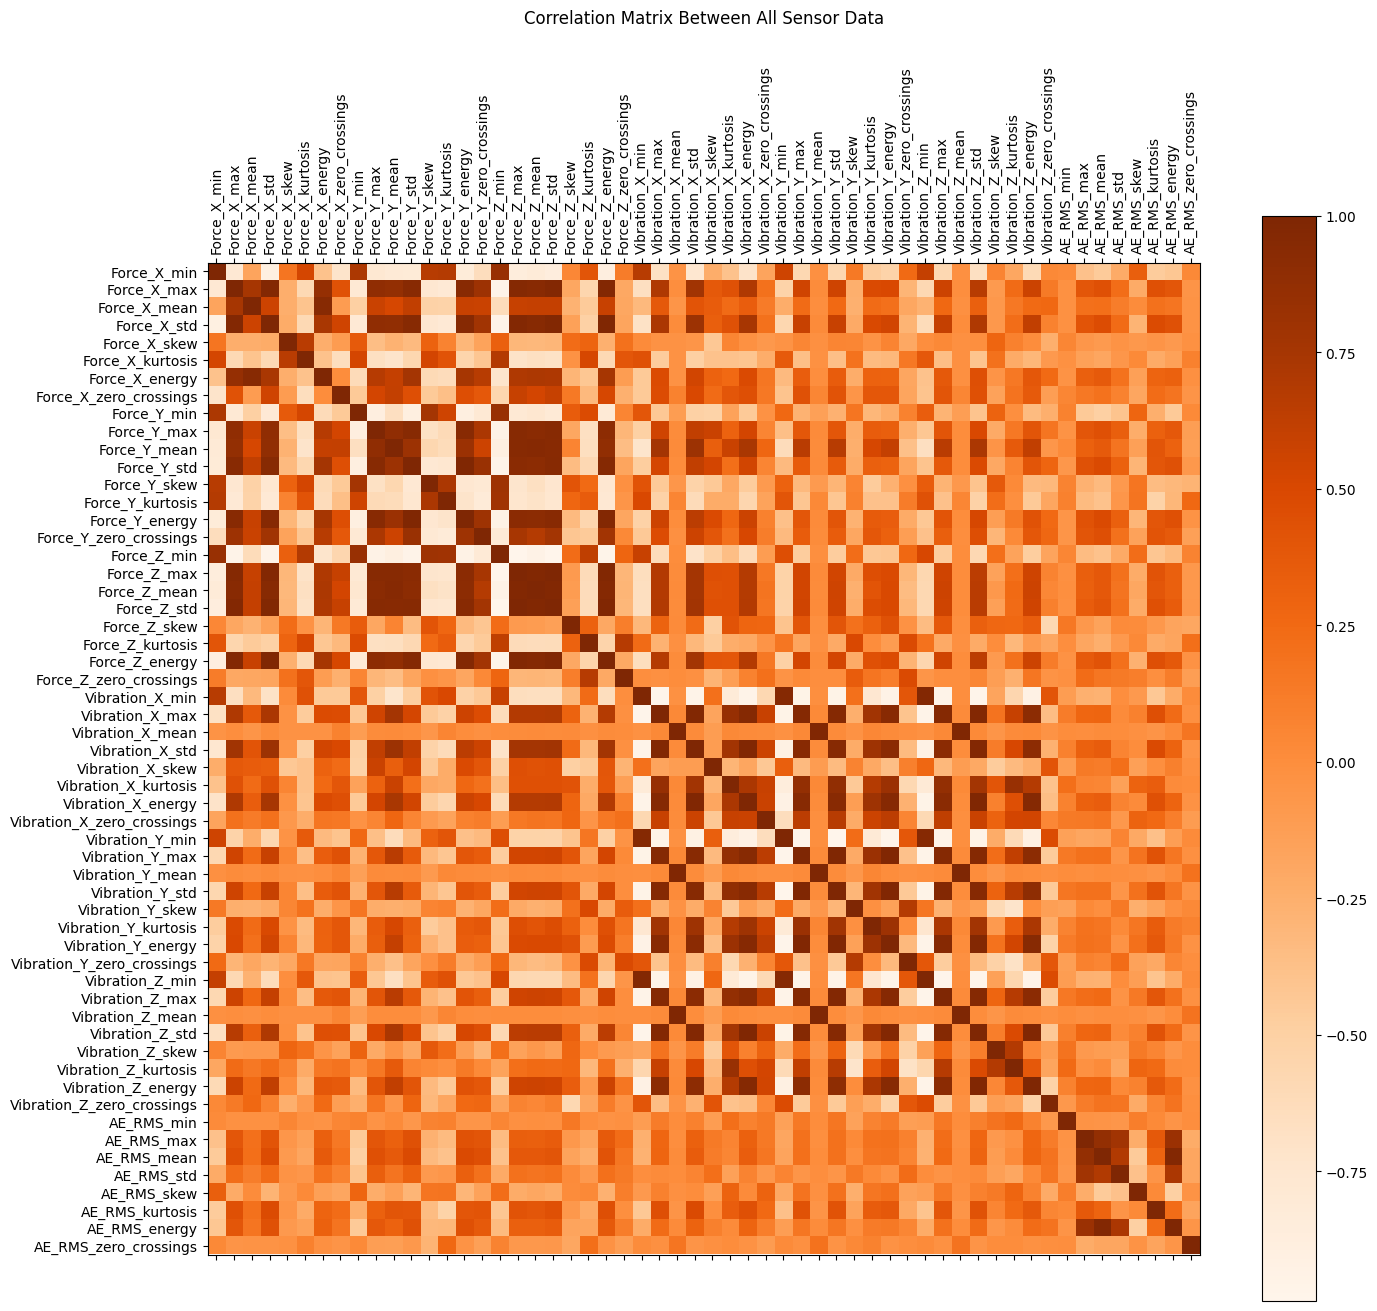

In [10]:
plt.figure(figsize=(16,14))
plt.matshow(all_stats_corr_matrix, fignum=1, cmap='Oranges')
plt.colorbar()
plt.xticks(range(len(all_stats_corr_matrix.columns)), all_stats_corr_matrix.columns, rotation=90)
plt.yticks(range(len(all_stats_corr_matrix.columns)), all_stats_corr_matrix.columns)
plt.title('Correlation Matrix Between All Sensor Data', pad=30)
plt.show()


## Load wear data

In [11]:
all_wear_data = pd.read_csv('../notebooks/correlation_files/combined_wear.csv', sep=',')

In [12]:
all_wear_data.head()

,flute_1,flute_2,flute_3
0,32.317114,48.892617,37.720825
1,37.914879,49.570815,37.720825
2,43.087910,50.302867,37.720825
3,47.859072,51.083652,37.849851
4,52.250329,51.908288,38.172665


In [13]:
all_wear_data.isnull().sum().sum

<bound method Series.sum of flute_1    0
flute_2    0
flute_3    0
dtype: int64>

## Correlations between calculated statistics and wear data

In [14]:
all_combined_data = pd.concat([all_cut_statistics, all_wear_data], axis=1)
all_combined_corr_matrix = all_combined_data.corr()

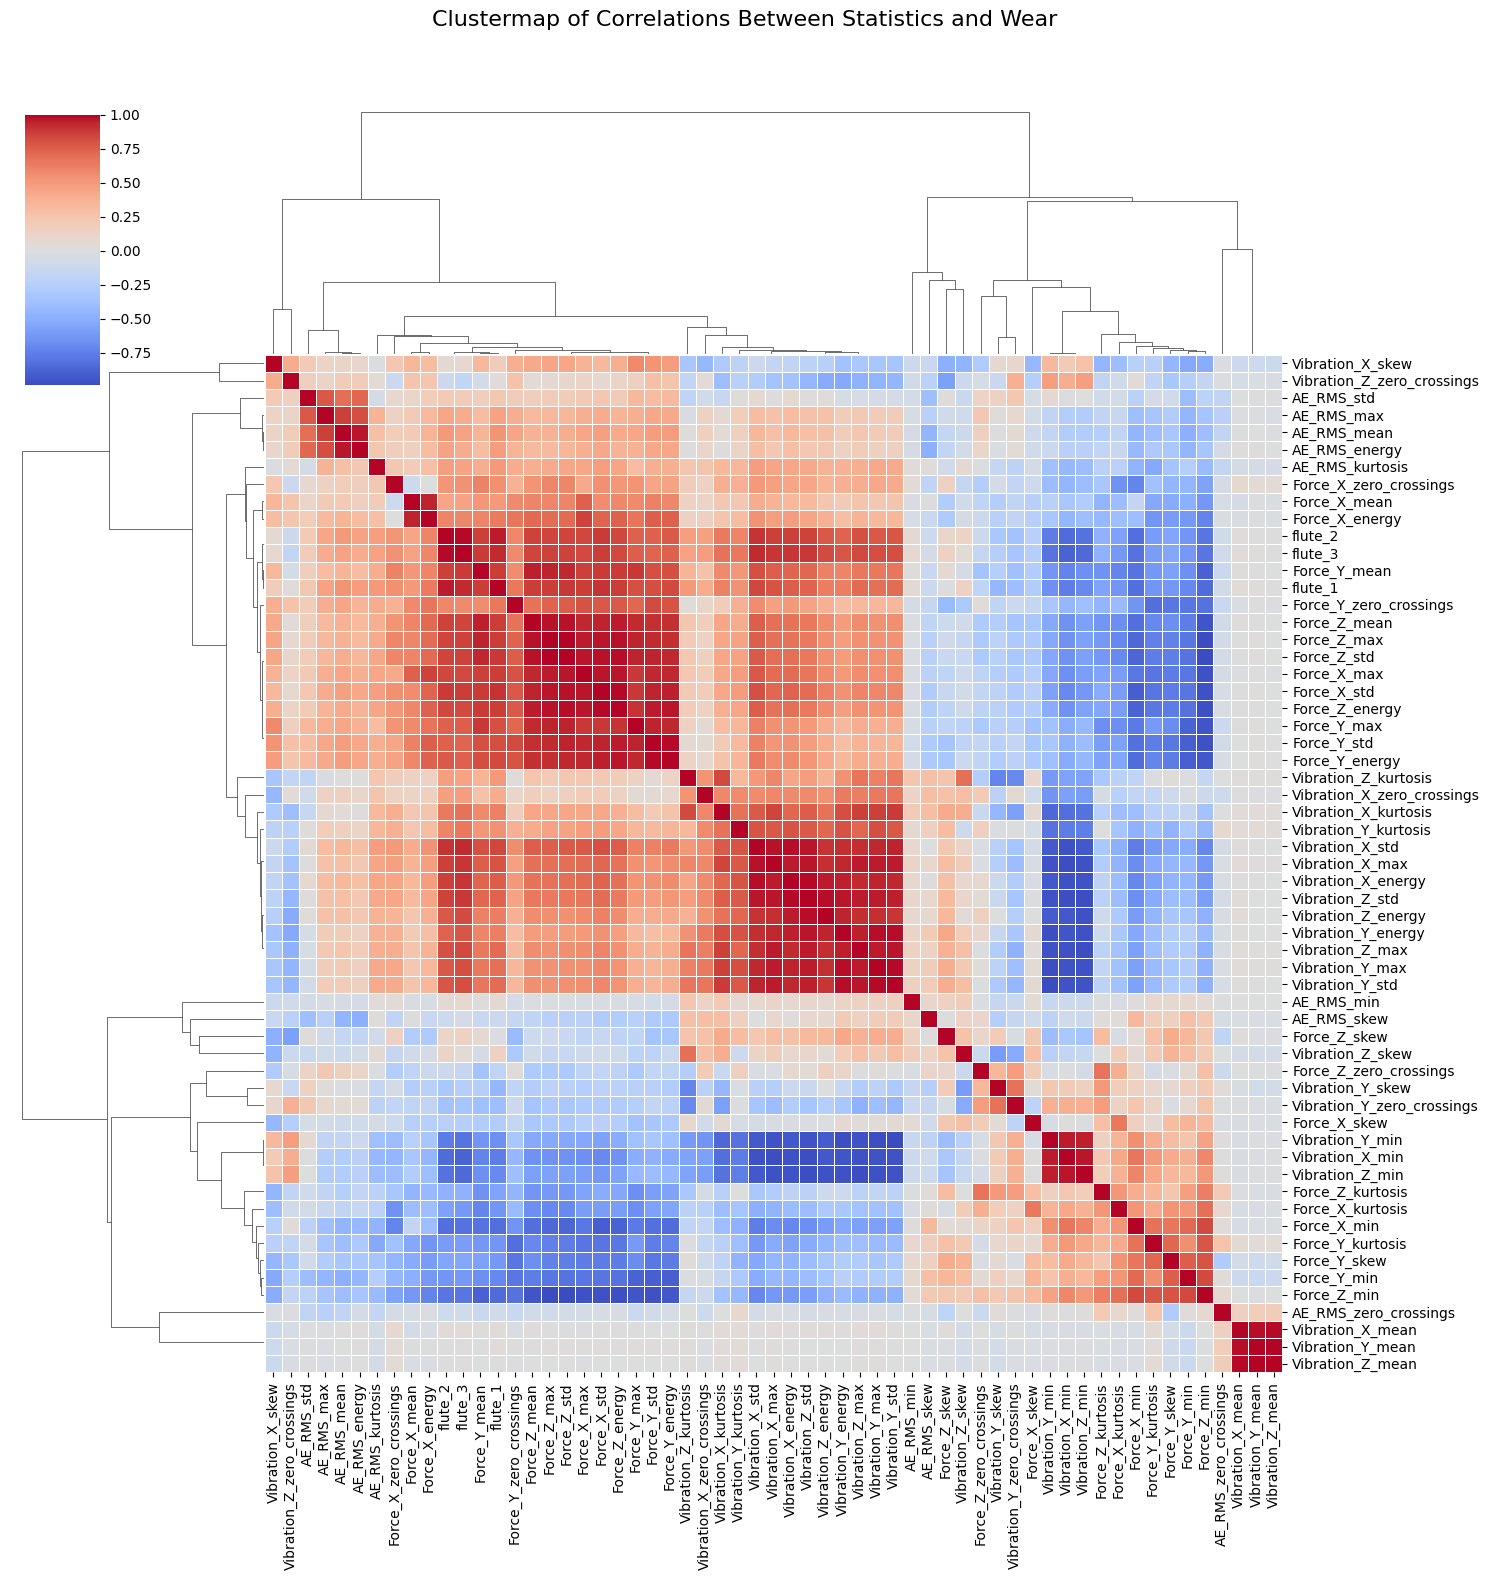

In [15]:
clustermap = sns.clustermap(all_combined_corr_matrix, metric='correlation', method='average', cmap='coolwarm', linewidths=0.5, figsize=(15, 15))
clustermap.figure.suptitle('Clustermap of Correlations Between Statistics and Wear', y=1.05, fontsize=16)
plt.show()

In [16]:
all_wear_corr_matrix = all_combined_corr_matrix[['flute_1', 'flute_2', 'flute_3']].drop(['flute_1', 'flute_2', 'flute_3'], axis=0)

As shown below, the Force measured in X dimension seems to have the most effect on wear.

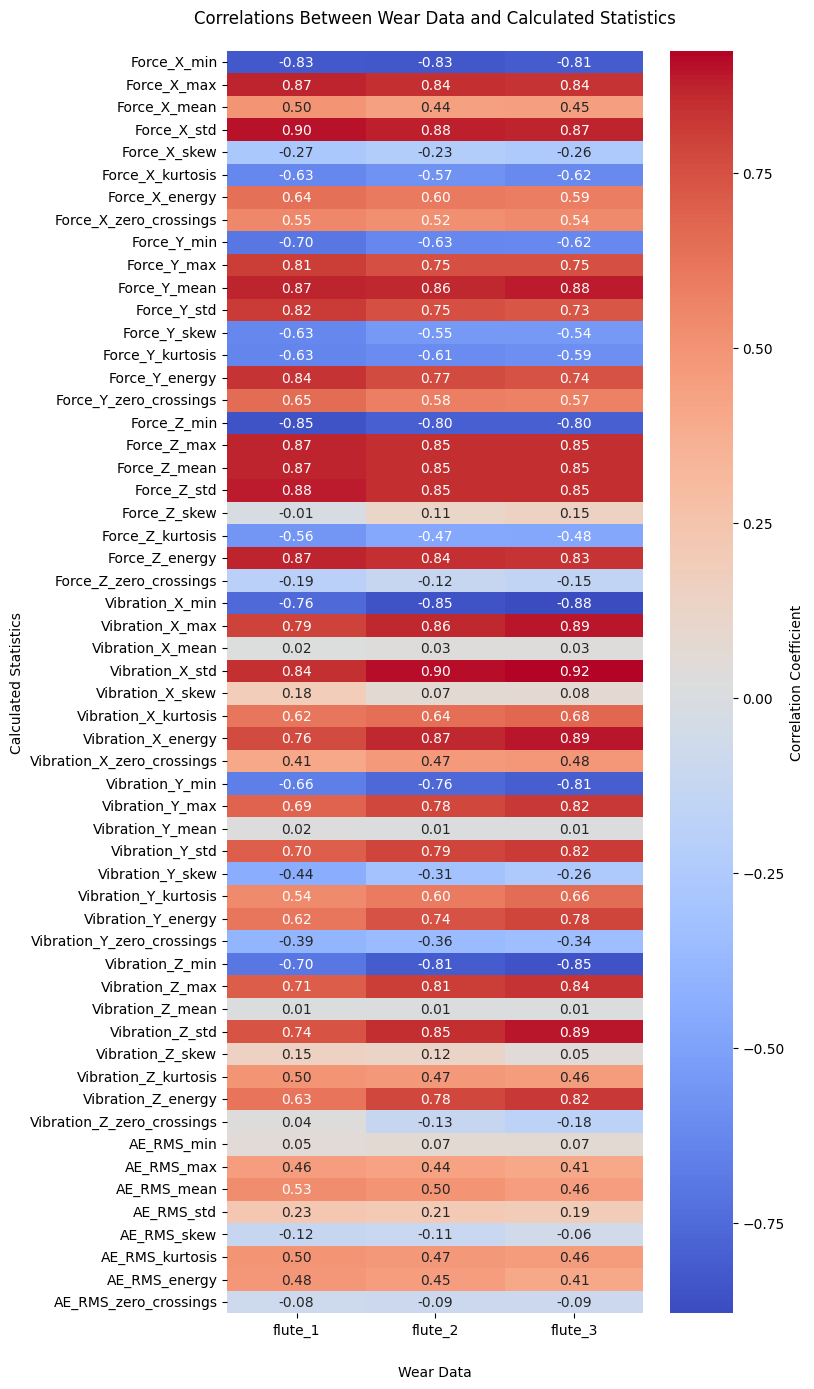

In [18]:

plt.figure(figsize=(8, 14))
sns.heatmap(all_wear_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10}, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlations Between Wear Data and Calculated Statistics', pad=20)
plt.ylabel('Calculated Statistics')
plt.xlabel('Wear Data', labelpad=20)
plt.tight_layout()
plt.show()


In [19]:
min_columns = [
    'Force_X_min', 
    'Force_Y_min', 
    'Force_Z_min', 
    'Vibration_X_min', 
    'Vibration_Y_min', 
    'Vibration_Z_min', 
    'AE_RMS_min'
]
min_stats = all_cut_statistics[min_columns]
combined_data_min = pd.concat([min_stats.reset_index(drop=True), all_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_min = combined_data_min.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
min_correlation_matrix = corr_matrix_min.loc[min_columns, wear_columns]


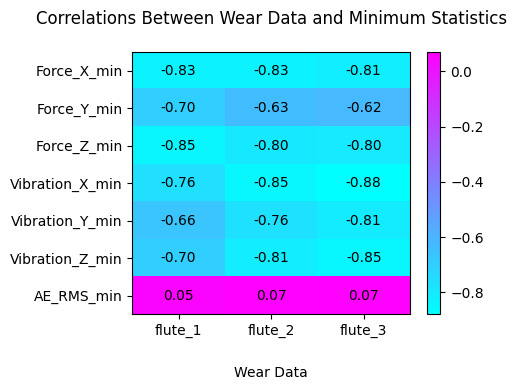

In [20]:
plt.figure(figsize=(5, 4))
plt.title('Correlations Between Wear Data and Minimum Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(min_correlation_matrix, cmap='cool', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(min_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(min_columns)), min_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()


In [21]:
max_columns = [
    'Force_X_max', 
    'Force_Y_max', 
    'Force_Z_max', 
    'Vibration_X_max', 
    'Vibration_Y_max', 
    'Vibration_Z_max', 
    'AE_RMS_max'
]
max_stats = all_cut_statistics[max_columns]
combined_data_max = pd.concat([max_stats.reset_index(drop=True), all_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_max = combined_data_max.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
max_correlation_matrix = corr_matrix_max.loc[max_columns, wear_columns]


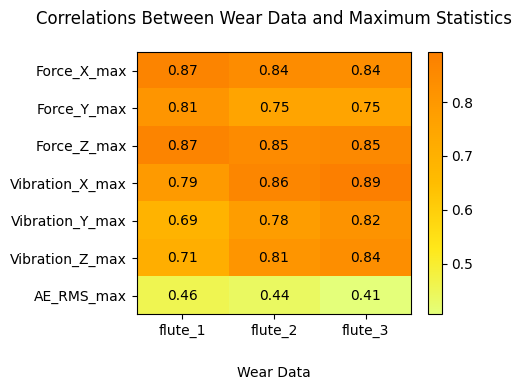

In [22]:
plt.figure(figsize=(5, 4))
plt.title('Correlations Between Wear Data and Maximum Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(max_correlation_matrix, cmap='Wistia', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(max_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(max_columns)), max_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

In [23]:
mean_columns = [
    'Force_X_mean', 
    'Force_Y_mean', 
    'Force_Z_mean', 
    'Vibration_X_mean', 
    'Vibration_Y_mean', 
    'Vibration_Z_mean', 
    'AE_RMS_mean'
]
mean_stats = all_cut_statistics[mean_columns]
combined_data_mean = pd.concat([mean_stats.reset_index(drop=True), all_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_mean = combined_data_mean.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
mean_correlation_matrix = corr_matrix_mean.loc[mean_columns, wear_columns]


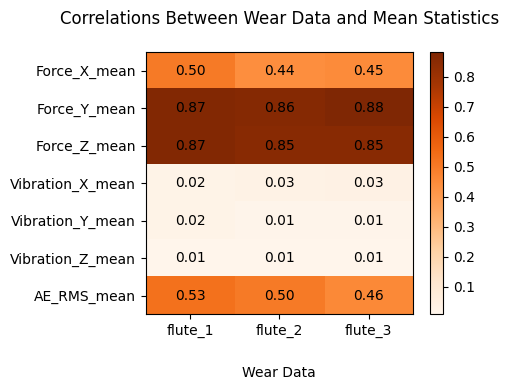

In [24]:
plt.figure(figsize=(5, 4))
plt.title('Correlations Between Wear Data and Mean Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(mean_correlation_matrix, cmap='Oranges', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(mean_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(mean_columns)), mean_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

In [25]:
std_columns = [
    'Force_X_std', 
    'Force_Y_std', 
    'Force_Z_std', 
    'Vibration_X_std', 
    'Vibration_Y_std', 
    'Vibration_Z_std', 
    'AE_RMS_std'
]
std_stats = all_cut_statistics[std_columns]
combined_data_std = pd.concat([std_stats.reset_index(drop=True), all_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_std = combined_data_std.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
std_correlation_matrix = corr_matrix_std.loc[std_columns, wear_columns]


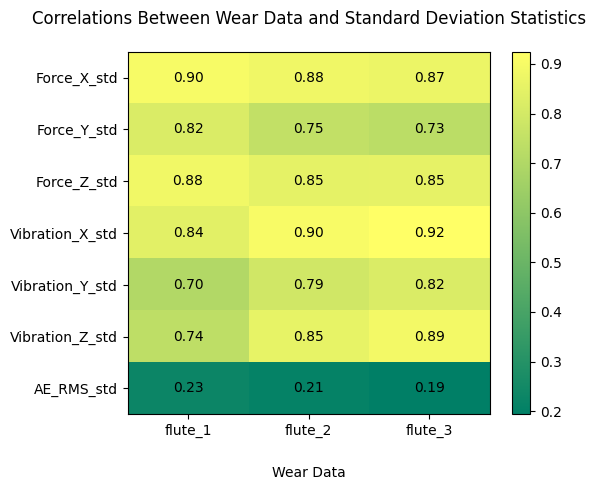

In [26]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Standard Deviation Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(std_correlation_matrix, cmap='summer', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(std_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(std_columns)), std_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

In [27]:
skew_columns = [
    'Force_X_skew', 
    'Force_Y_skew', 
    'Force_Z_skew', 
    'Vibration_X_skew', 
    'Vibration_Y_skew', 
    'Vibration_Z_skew', 
    'AE_RMS_skew'
]
skew_stats = all_cut_statistics[skew_columns]
combined_data_skew = pd.concat([skew_stats.reset_index(drop=True), all_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_skew = combined_data_skew.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
skew_correlation_matrix = corr_matrix_skew.loc[skew_columns, wear_columns]


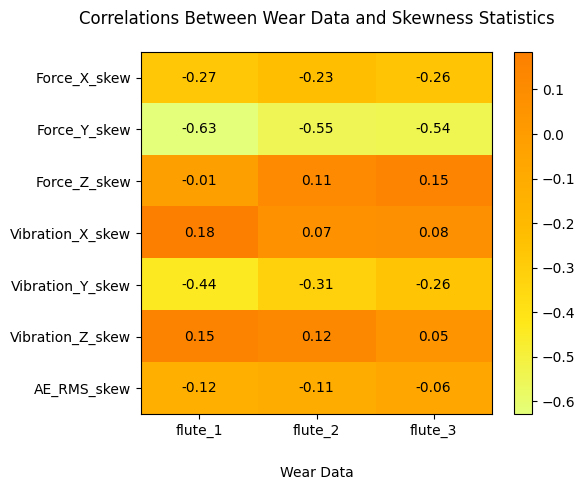

In [28]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Skewness Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(skew_correlation_matrix, cmap='Wistia', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(skew_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(skew_columns)), skew_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

In [29]:
kurtosis_columns = [
    'Force_X_kurtosis', 
    'Force_Y_kurtosis', 
    'Force_Z_kurtosis', 
    'Vibration_X_kurtosis', 
    'Vibration_Y_kurtosis', 
    'Vibration_Z_kurtosis', 
    'AE_RMS_kurtosis'
]
kurtosis_stats = all_cut_statistics[kurtosis_columns]
combined_data_kurtosis = pd.concat([kurtosis_stats.reset_index(drop=True), all_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_kurtosis = combined_data_kurtosis.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
kurtosis_correlation_matrix = corr_matrix_kurtosis.loc[kurtosis_columns, wear_columns]


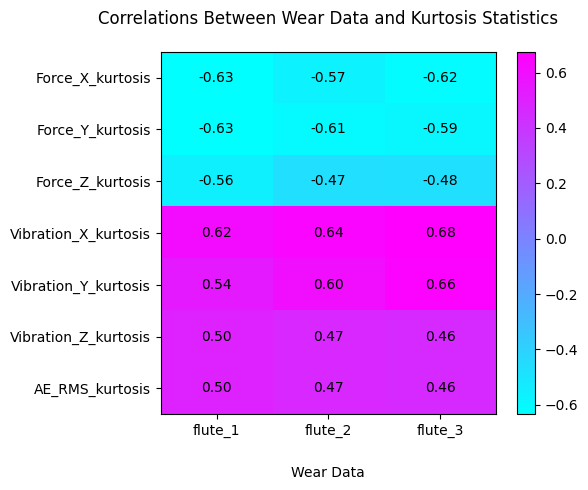

In [30]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Kurtosis Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(kurtosis_correlation_matrix, cmap='cool', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(kurtosis_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(kurtosis_columns)), kurtosis_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

In [31]:
zero_cross_columns = [
    'Force_X_zero_crossings', 
    'Force_Y_zero_crossings', 
    'Force_Z_zero_crossings', 
    'Vibration_X_zero_crossings', 
    'Vibration_Y_zero_crossings', 
    'Vibration_Z_zero_crossings', 
    'AE_RMS_zero_crossings'
]

zero_cross_stats = all_cut_statistics[zero_cross_columns]
combined_data_zero_cross = pd.concat([zero_cross_stats.reset_index(drop=True), all_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_zero_cross = combined_data_zero_cross.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
zero_cross_correlation_matrix = corr_matrix_zero_cross.loc[zero_cross_columns, wear_columns]



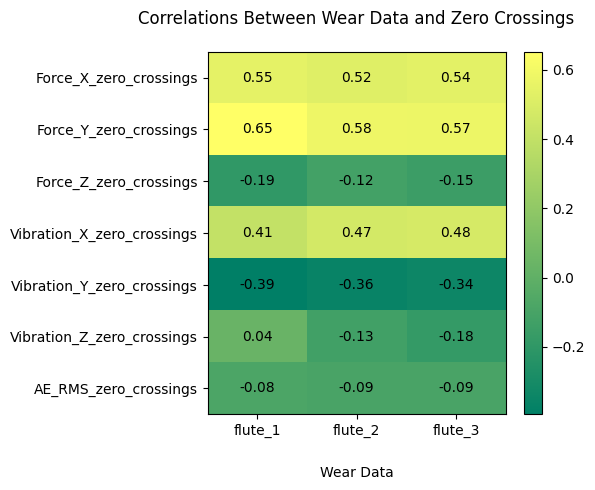

In [32]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Zero Crossings',  pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(zero_cross_correlation_matrix, cmap='summer', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(zero_cross_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(zero_cross_columns)), zero_cross_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

In [33]:
energy_columns = [
    'Force_X_energy', 
    'Force_Y_energy', 
    'Force_Z_energy', 
    'Vibration_X_energy', 
    'Vibration_Y_energy', 
    'Vibration_Z_energy', 
    'AE_RMS_energy'
]

energy_stats = all_cut_statistics[energy_columns]
combined_data_energy = pd.concat([energy_stats.reset_index(drop=True), all_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_energy= combined_data_energy.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
energy_correlation_matrix = corr_matrix_energy.loc[energy_columns, wear_columns]

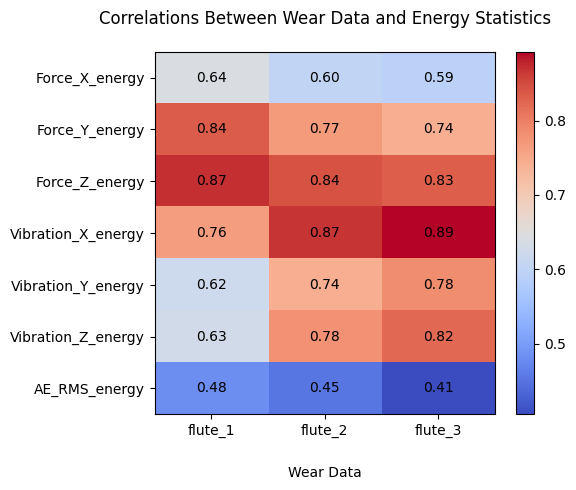

In [34]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Energy Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(energy_correlation_matrix, cmap='coolwarm', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(energy_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(energy_columns)), energy_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

## Conclusion

First, statistical calculations are made on each file of the dataset. The results of those are saved to a separate file, which then is used for the correlation analysis.
The calculated statisitcs:
- minimum
- maximum
- mean
- standard deviation
- skewness
- kurtosis
- energy
- zero crossings

The comprehensive analysis of the combined datasets (c1, c4, and c6) reveals critical insights into the wear patterns and operational stability of the cutting process across the three flutes. The correlations observed among the various metrics underscore the importance of monitoring both force and vibration data to optimize cutting performance.

### Correlations and Observations

#### Force metrics:

All three force metrics (X, Y, and Z) exhibit a range of correlations, with maximum values demonstrating particularly strong positive correlations across the flutes. For instance, Force_X_max consistently correlates highly, indicating that maximum forces are well-controlled during cutting. Notably, Force_Y_mean and Force_Z_mean show positive correlations as well, suggesting that average force applications remain stable across the operation.

#### Vibration metrics:

The vibration metrics, especially Vibration_X_max and Vibration_Z_max, also show robust positive correlations, reinforcing the relationship between vibrational behavior and force applications. This relationship emphasizes the necessity of controlling vibrations to maintain optimal cutting conditions.
AE_RMS Metrics: The acoustic emission metrics reveal moderate correlations with force and vibration data, indicating that while they provide valuable insights into the cutting process, they are secondary to the more critical force measurements.

#### Acoustic emission metrics:

The acoustic emission metrics reveal moderate correlations with force and vibration data, indicating that while they provide valuable insights into the cutting process, they are secondary to the more critical force measurements.

### Statistical insights:

Negative skewness in force metrics (e.g., Force_X_min, Force_Y_min) points to instances of significant dips, potentially indicative of tool disengagement or variability in material interaction. The kurtosis values, particularly negative for Force_X and Force_Y, suggest a stable cutting process with fewer extreme variations, highlighting the overall control in force application.

In contrast, the vibration metrics exhibit positive skewness and kurtosis values, suggesting the presence of peaks in vibration levels during certain operational conditions, warranting monitoring for tool wear or performance issues.

### Energy Analysis

The energy metrics across both force and vibration highlight a robust cutting operation, with values suggesting effective material engagement. The stability indicated by the standard deviations of these metrics is crucial for optimizing tool performance and longevity. However, lower AE_RMS energy values imply that acoustic emissions may not be the primary focus when assessing cutting effectiveness.

### Operational Stability

The consistency of zero crossings in both force and vibration metrics reflects a dynamic and responsive cutting process. This is particularly crucial for ensuring that cutting conditions remain optimal throughout operations. However, the negative zero crossings in some vibration metrics indicate moments of instability that may require further investigation.